# Статистика, основной поток
## Практическое задание 1

В данном задании вы визуализируйте некоторые свойства оценок (несмещенность, состоятельность, асимптотическая нормальность), посмотрите на свойства оценки максимального правдоподобия, а также сравните некоторые оценки при помощи построения функций риска.

**Правила:**

* Дедлайн **13 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[base] Фамилия Имя - задание 1"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов
* Задача 2 -  5 баллов
* Задача 3 -  5 баллов
* Задача 4 -  5 баллов
* Задача 5 -  5 баллов
* Задача 6 -  20 баллов

In [1]:
import numpy as np
import scipy.stats as sps
from scipy.special import factorial
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

**Задача 1.** В этой задаче предлагается изучить *свойство несмещённости*.

_____________________
**1.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** Как известно, несмещенная оценка параметра распределения это оценка, математическое ожидание которой равно самому оцениваемому параметру.

Исходя из этого определения, можно судить о том, какие из вышеперечисленных оценок являются несмещенными. Расчеты в номере 1 раздела 2 учебника дают, что оценки $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ являются несмещенными, а оценка  $X_{(n)}$ нет. При вычислении пользовались свойствами матожидания (в частности свойством линейности), а также результатом вычисления матожидания для равномерного распределения, которое равно $\frac{2}{\theta}$

Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$:

Вычислите $k = 500$ независимых оценок $\widehat{\theta_1}, ... , \widehat{\theta_k}$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $U[0, 1]$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta_1}, $y$), ... , (\widehat{\theta_k}, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ -- произвольные различные (например 0, 1, 2) координаты для трёх различных типов оценок.

Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение трёх типов оценок и их среднее.

Копипаста неприемлема, используйте циклы и функции.

Используйте данный шаблон для визуализации значений:

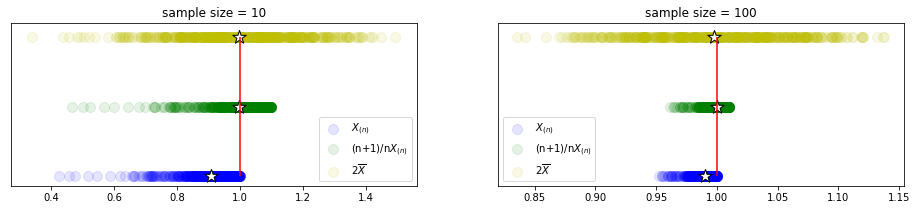

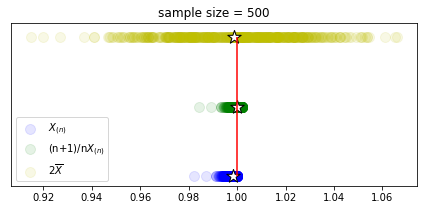

In [2]:
plt.figure(figsize=(16, 3))
for k in ([10, 100, 500]):
    mas = sps.uniform.rvs(size=(500,k))
    X = mas.max(axis=1)
    Y = ((k+1) / k)*mas.max(axis=1)
    Z = 2*(mas.mean(axis=1))
    
    if k == 10:
        plt.subplot(1, 2, 1)
    elif k == 100:
        plt.subplot(1, 2, 2)
    elif k == 500:
        plt.figure(figsize=(16,3))
        plt.subplot(1, 2, 1)
    plt.scatter(X, np.zeros_like(X) + 1, alpha=0.1, s=100, color='b', label= '$X_{(n)}$')
    plt.scatter(X.mean(), 1, marker='*', s=200, color='w', edgecolors='black')
    plt.scatter(Y, np.zeros_like(Y) + 2, alpha=0.1, s=100, color='g', label='(n+1)/n$X_{(n)}$')
    plt.scatter(Y.mean(), 2, marker='*', s=200, color='w', edgecolors='black')
    plt.scatter(Z, np.zeros_like(Z) + 3, alpha=0.1, s=100, color='y', label= '$2\overline{X}$')
    plt.scatter(Z.mean(), 3, marker='*', s=200, color='w', edgecolors='black')
    plt.vlines(1, 1, 3, color='r')
    plt.title('sample size = %d' % k)
    plt.yticks([])
    plt.legend()
plt.show()

__________________
**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для трёх типов оценок. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

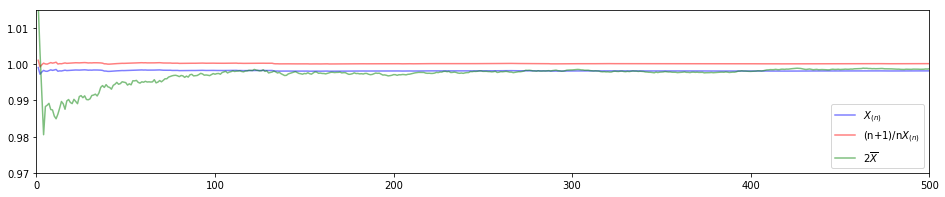

In [3]:
plt.figure(figsize=(16,3))
mas1 = np.array(X.cumsum(axis=0) / np.linspace(1, 500, 500))
plt.plot(np.linspace(1, 500, 500), mas1, color='b', alpha =0.5, label='$X_{(n)}$')

mas2 = np.array(Y.cumsum(axis=0) / np.linspace(1, 500, 500))
plt.plot(np.linspace(1, 500, 500), mas2, color='r', alpha =0.5, label='(n+1)/n$X_{(n)}$')

mas3 = np.array(Z.cumsum(axis=0) / np.linspace(1, 500, 500))
plt.plot(np.linspace(1, 500, 500), mas3, color='g', alpha =0.5, label='$2\overline{X}$')

plt.ylim((0.97, 1.015))
plt.xlim((0, 500))
plt.legend()
plt.show()
    

Можно увидеть, что график подтверждает теоретические заключения о несмещенности, то есть матожидания несмещенных оценок стремятся к $\theta$ (в данном случае $\theta = 1$) с увеличением размера выборки, в то время как матожидание не несмещенной оценки не стремится к значению параметра.

_______________________________________________________
**3.** Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$. Какие из этих оценок являются несмещенными?

*Напоминание:* $S^2 = \frac{1}{n} \sum\limits_{i = 1}^{n} (X_i - \overline{X})^2 = \overline{X^2} - \overline{X}^2$

**Ответ:** Пользуясь определением несмещенной оценки находим, что выборочная дисперсия $S^2$ не является несмещенной оценкой параметра $\sigma^2$, так как $E_{S^2} = \frac{n-1}{n} \sigma^2$ (№4 раздела 2 учебника). То есть несмещенной оценкой является только исправленная выборочная дисперсия $\frac{n}{n-1}S^2$.

Для данной модели повторите действия из первых двух частей.

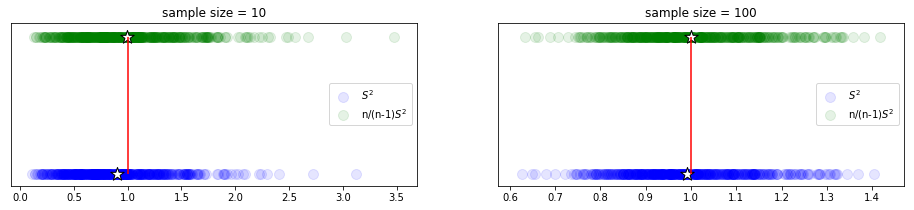

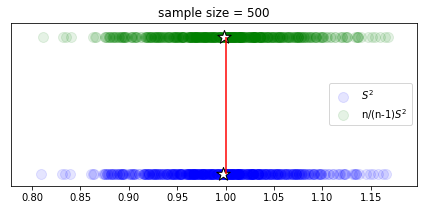

In [4]:
plt.figure(figsize=(16, 3))
for k in ([10, 100, 500]):
    mas = sps.norm.rvs(size=(500,k))
    X = (mas ** 2).mean(axis=1) - (mas.mean(axis=1)) ** 2
    Y = (k / (k-1))*X

    if k == 10:
        plt.subplot(1, 2, 1)
    elif k == 100:
        plt.subplot(1, 2, 2)
    elif k == 500:
        plt.figure(figsize=(16,3))
        plt.subplot(1, 2, 1)
    plt.scatter(X, np.zeros_like(X) + 1, alpha=0.1, s=100, color='b', label= '$S^2$')
    plt.scatter(X.mean(), 1, marker='*', s=200, color='w', edgecolors='black')
    plt.scatter(Y, np.zeros_like(Y) + 2, alpha=0.1, s=100, color='g', label='n/(n-1)$S^2$')
    plt.scatter(Y.mean(), 2, marker='*', s=200, color='w', edgecolors='black')
    plt.vlines(1, 1, 2, color='r')
    plt.title('sample size = %d' % k)
    plt.yticks([])
    plt.legend()
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Исходя из полученных результатов можно заключить, что свойство несмещенности оценки гарантирует отсутствие ошибки в среднем, то есть при систематическом использовании оценки.

__________________

**Задача 2.** В этой задаче нужно визуализировать *свойство состоятельности*.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, \theta)$. Из домашнего задания известно, что оценки $\theta^* = 2\overline{X}, \widehat{\theta} = X_{(n)}$ являются состоятельными оценками $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них указанные выше оценки параметра $\theta$ в зависимости от размера выборки и визуализировав их состоятельность.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$, $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)`.

In [5]:
import pandas
mas1 = sps.uniform.rvs(size=(300, 500))
mas2 = pandas.DataFrame(sps.uniform.rvs(size=(300, 500)))
X1 = np.array((2*mas1).cumsum(axis=1) / np.linspace(1, 500, 500))
X2 = np.array(mas2.cummax(axis=1))

Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

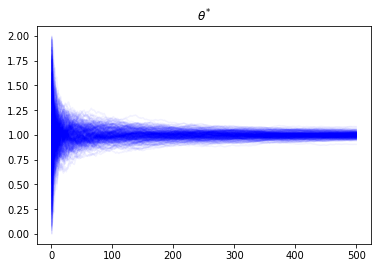

In [8]:
for i in range(0, 300):
    plt.plot(np.linspace(1, 500, 500), X1[i], color='b', alpha =0.05)
plt.title('$\\theta^{*}$')
plt.show()

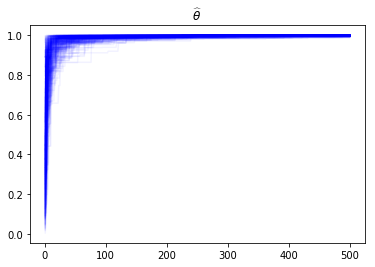

In [10]:
plt.figure()
for i in range(0, 300):
    plt.plot(np.linspace(1, 500, 500), X2[i], color='b', alpha =0.05)
plt.title('$\widehat{\\theta}$')
plt.show()

Сделайте вывод о свойстве состоятельности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод: ** Как известно, оценка является состоятельной, если она стремится по вероятности к оцениваемому пар-ру при $n \rightarrow \infty$. Из графиков видно, что обе оценки сходятся к $\theta = 1$ с увеличением выборки, что подтверждает наличие у них рассматриваемого свойства.

__________________
**Задача 3.** В этой задаче нужно визуализировать *свойство асимптотической нормальности*.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\theta^* = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \theta^*_{jn} - \theta \right)$, где $\theta = 1$.

In [11]:
mas3 = sps.uniform.rvs(size=(300, 500))
X = ((2*mas3).cumsum(axis=1) / np.linspace(1, 500, 500))
Z = (np.linspace(1, 500, 500) ** 0.5) * (X - 1)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

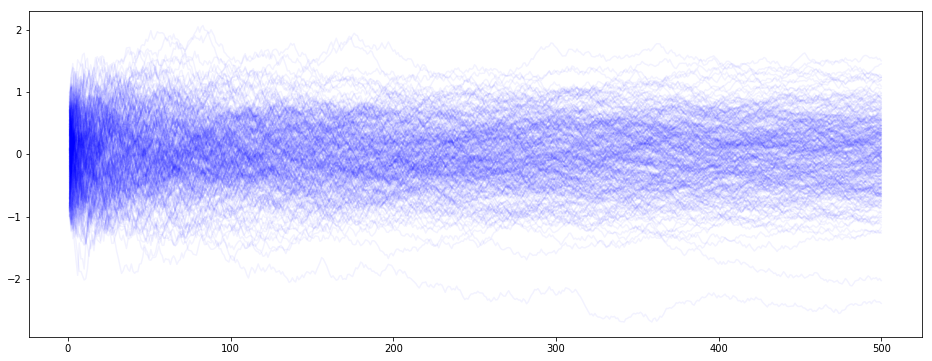

In [12]:
plt.figure(figsize=(16, 6))
for i in range(0, 300):
    plt.plot(np.linspace(1, 500, 500), Z[i], color='b', alpha =0.05)
plt.show()

**Ответ:** $Z_{jn}$ не сходятся к какой-то определенной константе, это можно объяснить ЦПТ, согласно которой в данном влучае $Z_{jn} = \sqrt{n} (\theta^{*}_{jn} - 1) \overset{\text{d}}{\to} \xi \sim \mathcal{N}(0, \sigma^2)$.

Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте гистограмму и график плотности распределения $\mathcal{N}(0, \frac{1}{3})$.  Не забудьте сделать легенду.

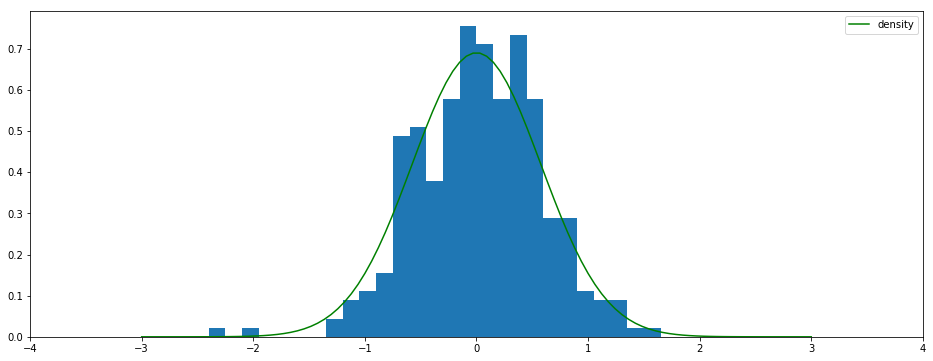

In [13]:
Z1 = Z.T
plt.figure(figsize=(16,6))
plt.hist(Z1[499], range=(-3, 3), bins=40, normed=True)
grid = np.linspace(-3, 3, 100)
plt.plot(grid, sps.norm(scale=((1/3) ** 0.5)).pdf(grid), color='g', label='density')
plt.legend()
plt.xlim((-4, 4))
plt.show()

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** Полученные результаты иллюстрируют свойство асимптотической нормальности исследуемых оценок, которое заключается в том, что распределение оценки стремится к нормальному при увеличении числа точек выборки. Также свойство ассимптотической нормальности сразу следует из ЦПТ, что видно из графика ($Z_{jn}\longrightarrow \mathcal{N}(\theta, \frac{1}{3})$). $\frac{1}{3}$ - значение асимпотической дисперсии данной оценки.

__________________
**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$.  Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [14]:
mas = pandas.DataFrame(sps.uniform.rvs(size=(300,500)))
mas1= np.array(mas.cummax(axis=1))
T = (np.linspace(1, 500, 500)) * (np.ones(mas1.shape) - mas1)

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

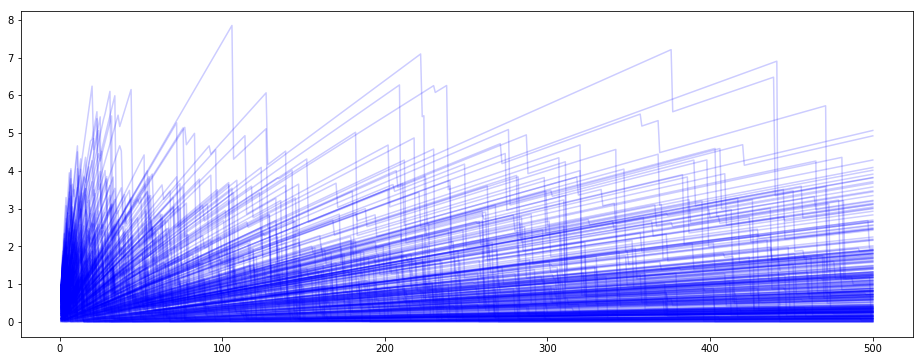

In [15]:
plt.figure(figsize=(16, 6))
for i in range(0, 300):
    plt.plot(np.linspace(1, 500, 500), T[i], color='b', alpha =0.2)
plt.show()

**Ответ:** Из графика можно заключить, что указанная величина не сходится к какой-то константе, аналогично предыдущей задаче.

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

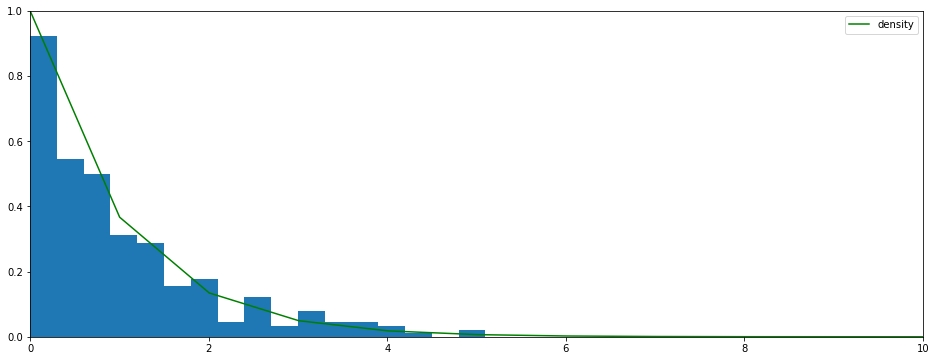

In [16]:
T1 = T.T
plt.figure(figsize=(16,6))
plt.hist(T1[499], range=(0, 300), bins=1000, normed=True)
grid = np.linspace(0, 300, 300)
plt.plot(grid, sps.expon.pdf(grid, scale=1), color='g', label='density')
plt.legend()
plt.ylim((0, 1))
plt.xlim((0, 10))
plt.show()

Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$? Что можно сказать в сравнении с оценкой, рассмотренной в предыдущей задаче?

**Вывод: ** Из того, что гистограмма достаточно хорошо приближает плотность указанного распределения, как раз можно сказать, что $T_n \stackrel{d_\theta}{\longrightarrow} Exp(1)$ по распределению, а значит свойство выполняется. То есть по результатам задачи можем увидеть, то отклонения оценок могут иметь не только нормальное распределение (как в задаче 3), но и экспоненциальное.

__________________
**Задача 5.** Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [17]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    """
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

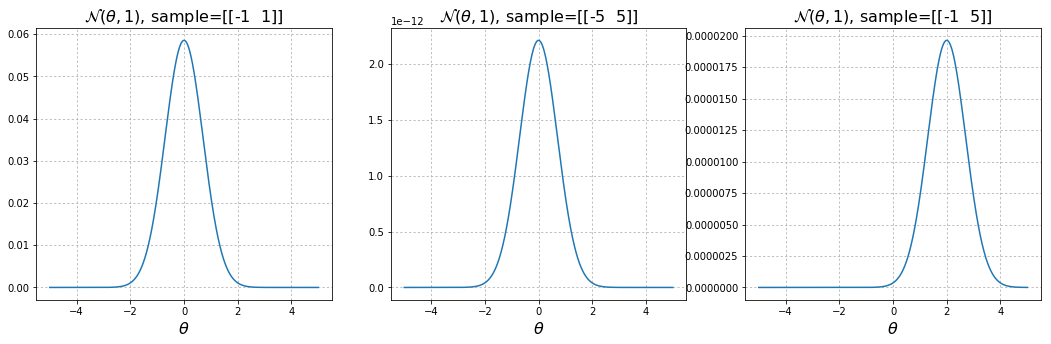

In [18]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

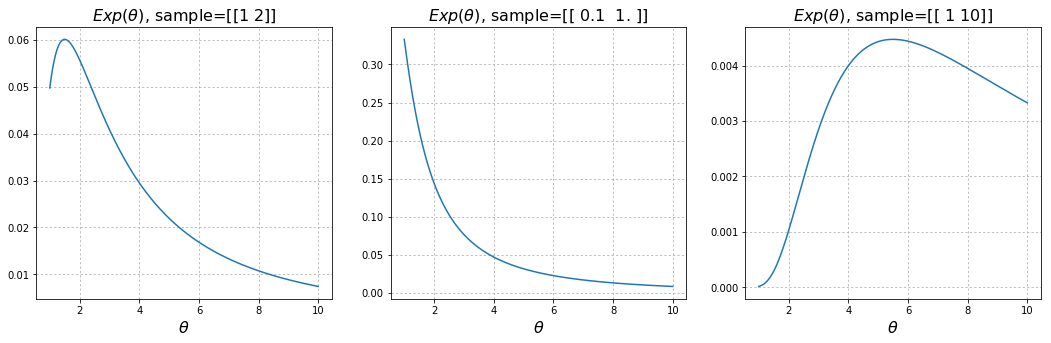

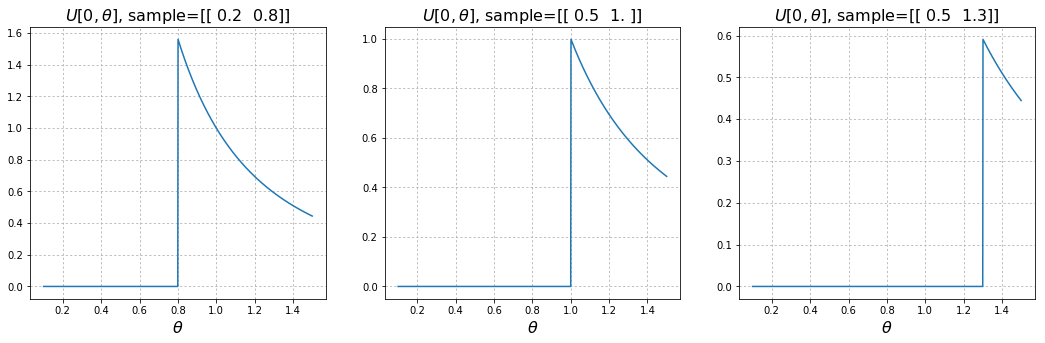

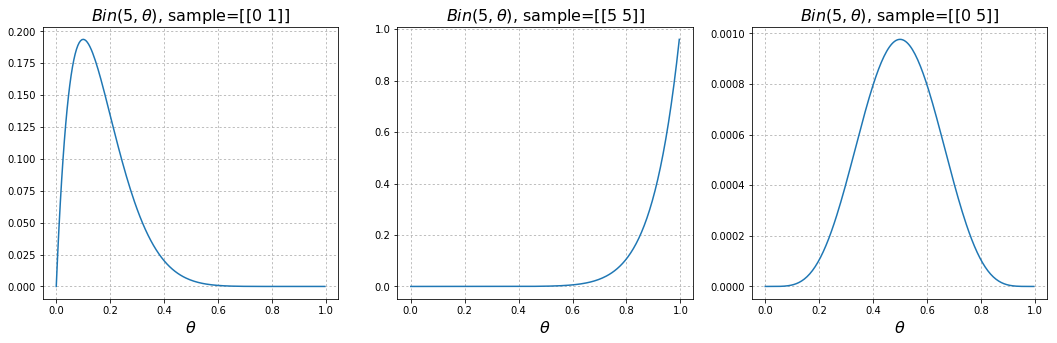

In [26]:
grid1 = np.linspace(1, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=grid1).pdf, grid1, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

grid2 = np.linspace(0.1, 1.5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid2).pdf, grid2, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

grid3 = np.linspace(0, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid3).pmf, grid3, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')


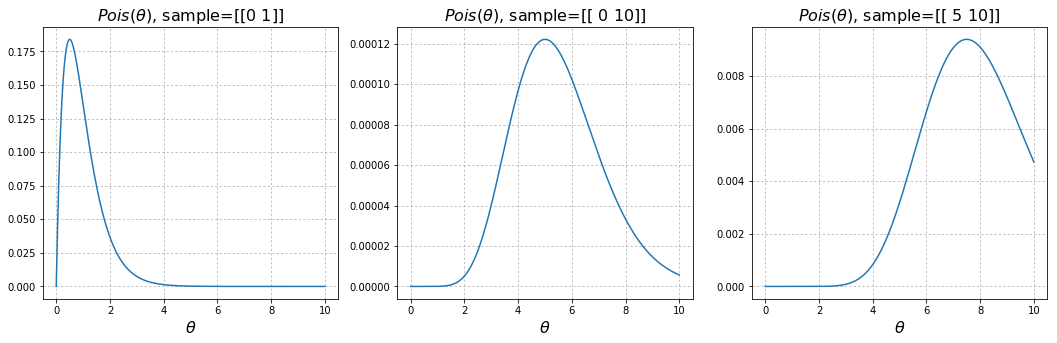

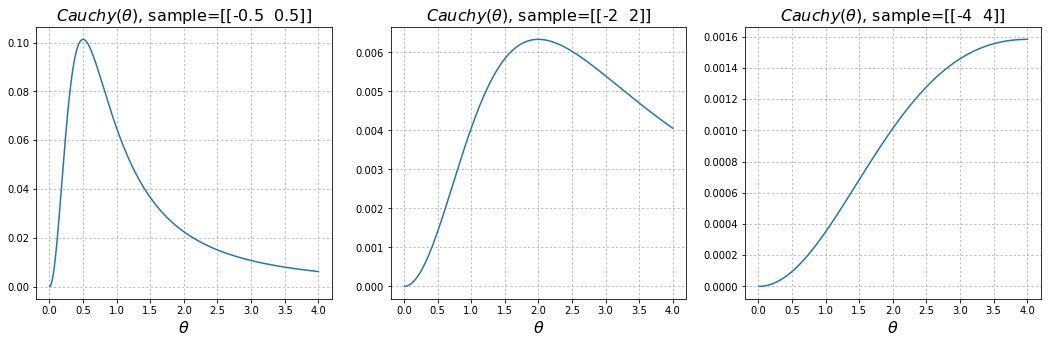

In [27]:
grid4 = np.linspace(0, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid4).pmf, grid4, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

grid5 = np.linspace(-4, 4, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(scale=grid5).pdf, grid5, 
                [[-0.5, 0.5], [-2, 2], [-4, 4]], '$Сauchy(\\theta)$')


Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**
Mожно сказать, что если плотность существует, то функция правдоподобия является совместной функцией плотности вектора (выборки). Графики являются этому подтверждением.


Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [20]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы: **
Результат оказывается равным 0 из-за слишком большого объема выборки (все плотности < 1 поэтому при перемножении плотностей выборки большого размера результат получается << 1 и приводится к 0). Эту проблему можно избежать, считая не саму функцию правдоподобия, а её логарифм (то есть логарифмическую функцию правдоподобия). Как видно, результат получается ненулевой.

In [21]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-142104.730377


__________________
**Задача 6.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

In [ ]:
plt.plot(<сетка по параметру>, <функция риска>,
         label=<latex-метка>)  # для каждой оценки
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(<тип функции потерь>, fontsize=16)
plt.ylim((0, <ограничение сверху>))

**Решение:**

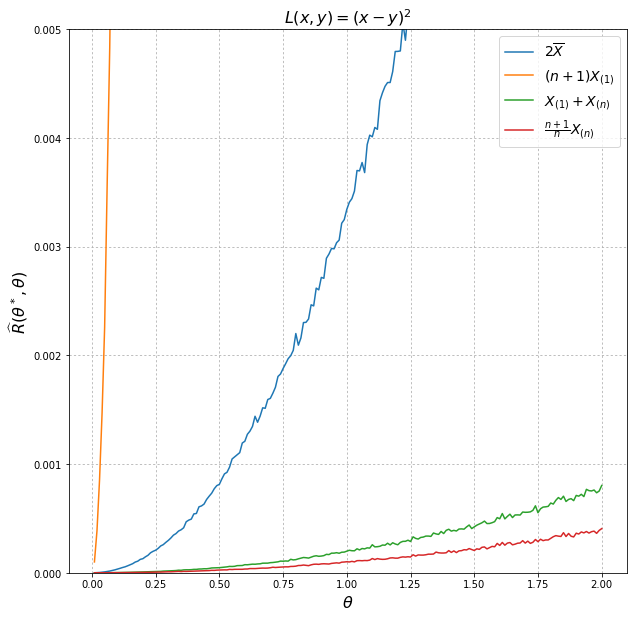

In [22]:
theta = np.arange(0.01, 2.01, 0.01)
X = np.zeros(shape=(200, 5000, 100))
j = 0
for t in theta:
    X[j] = sps.uniform.rvs(size=(5000, 100), scale = t)
    j += 1
X1 = 2*(1/100)*X.sum(axis=2)
X2 = 101*X.min(axis=2)
X3 = X.min(axis=2) + X.max(axis=2)
X4=(101/100)*X.max(axis=2)
theta1 = (np.ones(shape=(5000, 200))*theta).T
R1=(1/5000)*((X1 - theta1)**2).sum(axis=1)
R2=(1/5000)*((X2 - theta1)**2).sum(axis=1)
R3=(1/5000)*((X3 - theta1)**2).sum(axis=1)
R4=(1/5000)*((X4 - theta1)**2).sum(axis=1)
plt.figure(figsize=(10, 10))
plt.plot(theta, R1, label='$2\overline{X}$')
plt.plot(theta, R2, label='$(n+1)X_{(1)}$')
plt.plot(theta, R3, label='$X_{(1)}+X_{(n)}$')
plt.plot(theta, R4, label='$\\frac{n+1}{n} X_{(n)}$')
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('$L(x, y)=(x-y)^2$', fontsize=16)
plt.ylim((0, 0.005))
plt.show()

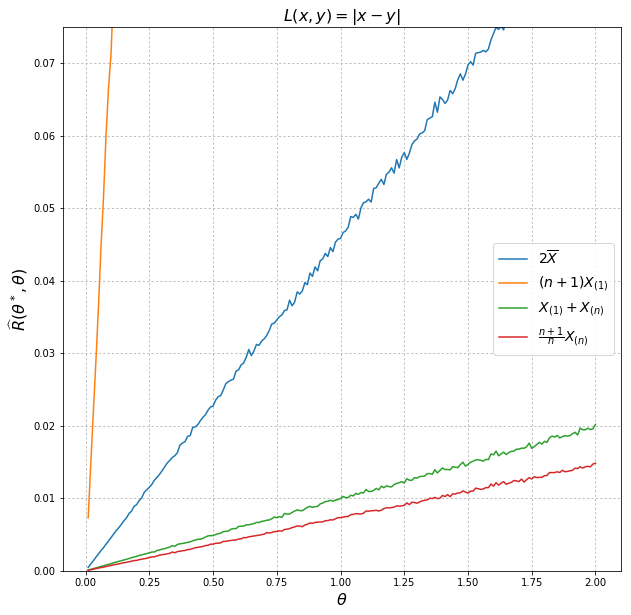

In [23]:
R11=(1/5000)*(abs(X1 - theta1)).sum(axis=1)
R12=(1/5000)*(abs(X2 - theta1)).sum(axis=1)
R13=(1/5000)*(abs(X3 - theta1)).sum(axis=1)
R14=(1/5000)*(abs(X4 - theta1)).sum(axis=1)
plt.figure(figsize=(10, 10))
plt.plot(theta, R11, label='$2\overline{X}$')
plt.plot(theta, R12, label='$(n+1)X_{(1)}$')
plt.plot(theta, R13, label='$X_{(1)}+X_{(n)}$')
plt.plot(theta, R14, label='$\\frac{n+1}{n} X_{(n)}$')
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('$L(x, y)=\\left|x-y\\right|$', fontsize=16)
plt.ylim((0, 0.075))
plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:**  Исходя из определения оценка $\theta_1$ лучше оценки $\theta_2$ в равномерном подходе, если для любого $\theta$ выполнено $R(\theta_1, \theta) \leq R(\theta_2, \theta)$ и для некоторого $\theta$ неравенство строгое. Опираясь на графики и следуя определению можно сказать, что оценка $\frac{n+1}{n} X_{(n)}$ является наилучшей среди заданных оценок в обоих подходах (её график проходит ниже всех остальных).

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Рассмотрим оценки $\left(k! \middle/ \overline{X^k} \right)^{1 / k}$ для $1 \leqslant k \leqslant 5$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не дублировать код. Функция факториала реализована как  `scipy.special.factorial`.

**Решение:**

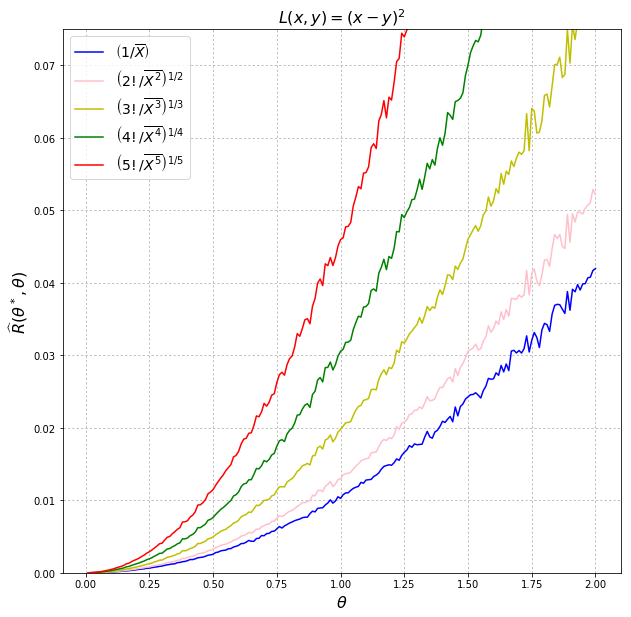

In [24]:
import scipy
theta = np.arange(0.01, 2.01, 0.01)
theta1 = (np.ones(shape=(5000, 200))*theta).T
X = np.zeros(shape=(200, 5000, 100))
j = 0
for t in theta:
    X[j] = sps.expon.rvs(size=(5000, 100), scale = (1/t))
    j += 1
Y = np.zeros(shape=(5, 200, 5000))
R = np.zeros(shape=(5,200))
R1 = np.zeros(shape=(5, 200))
plt.figure(figsize=(10, 10))
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.title('$L(x, y)=(x-y)^2$', fontsize=16)
for k in range(1, 6):
    Y[k-1] = (scipy.special.gamma(k+1) / ((1/100)*((X**k).sum(axis=2))))**(1/k)
    R[k-1] = (1/5000)*((Y[k-1] - theta1)**2).sum(axis=1)
    R1[k-1] = (1/5000)*(abs(Y[k-1] - theta1)).sum(axis=1)

plt.plot(theta, R[0], color='b', label='$\\left(1 / \\overline{X}\\right)$')
plt.plot(theta, R[1], color='pink', label='$\\left(2! / \\overline{X^2}\\right)^{1/2}$')
plt.plot(theta, R[2], color='y', label='$\\left(3! / \\overline{X^3}\\right)^{1/3}$')
plt.plot(theta, R[3], color='g', label='$\\left(4! / \\overline{X^4}\\right)^{1/4}$')
plt.plot(theta, R[4], color='r', label='$\\left(5! / \\overline{X^5}\\right)^{1/5}$')
plt.ylim((0, 0.075))
plt.legend(fontsize=14)
plt.show()

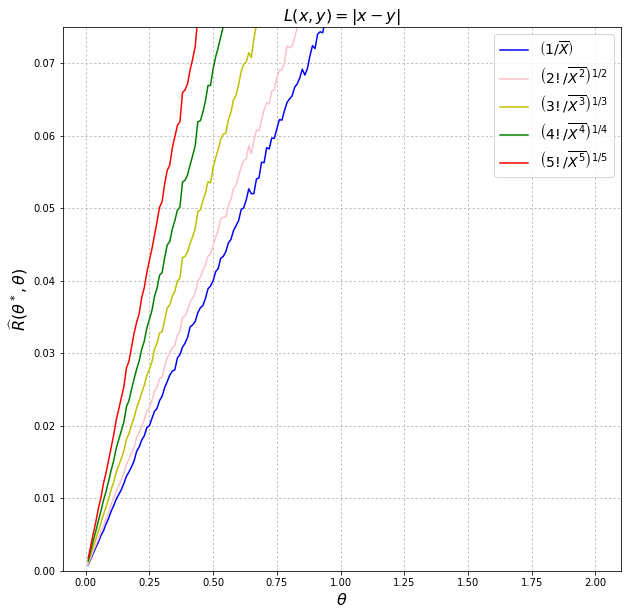

In [25]:
plt.figure(figsize=(10, 10))
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.title('$L(x, y)=\\left|x-y\\right|$', fontsize=16)
plt.plot(theta, R1[0], color='b', label='$\\left(1 / \\overline{X}\\right)$')
plt.plot(theta, R1[1], color='pink', label='$\\left(2! / \\overline{X^2}\\right)^{1/2}$')
plt.plot(theta, R1[2], color='y', label='$\\left(3! / \\overline{X^3}\\right)^{1/3}$')
plt.plot(theta, R1[3], color='g', label='$\\left(4! / \\overline{X^4}\\right)^{1/4}$')
plt.plot(theta, R1[4], color='r', label='$\\left(5! / \\overline{X^5}\\right)^{1/5}$')
plt.ylim((0, 0.075))
plt.legend(fontsize=14)
plt.show()

**Вывод:** Аналогично первому пункту задачи, исходя из полученных результатов оценка $\frac{1}{\overline{X}}$ является наилучшей среди предложенных в задаче оценок в обоих подходах.